<a href="https://colab.research.google.com/github/ops41/DSND_Term1/blob/master/demo_finding_donors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Getting started

[GitHub: Necessary project files][project_files]

[project_files]: https://github.com/udacity/DSND_Term1/tree/master/projects/p1_charityml

---
# Task: $\downarrow$

In [29]:
# task: state version of python
!python --version

Python 3.6.9


---

In [30]:
# updating working directory
!pwd
!ls
%cd drive/MyDrive/notebooks/pytorch/projects/finding_donors
!ls

/content/drive/My Drive/notebooks/pytorch/projects/finding_donors
census.csv  demo_finding_donors.ipynb  others  __pycache__  visuals.py
[Errno 2] No such file or directory: 'drive/MyDrive/notebooks/pytorch/projects/finding_donors'
/content/drive/MyDrive/notebooks/pytorch/projects/finding_donors
census.csv  demo_finding_donors.ipynb  others  __pycache__  visuals.py


## Exploring the data

In [31]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Load the Census dataset
data = pd.read_csv("census.csv")

# Success - Display the first record
display(data.head(n=1))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K


---
# Task: $\downarrow$

In [32]:
# implementing data exploration
data_height = data.shape[0] #count number of rows without counting the header
data_width = data.shape[1]  #count number of columns
print('Data types')
data.info()

Data types
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              45222 non-null  int64  
 1   workclass        45222 non-null  object 
 2   education_level  45222 non-null  object 
 3   education-num    45222 non-null  float64
 4   marital-status   45222 non-null  object 
 5   occupation       45222 non-null  object 
 6   relationship     45222 non-null  object 
 7   race             45222 non-null  object 
 8   sex              45222 non-null  object 
 9   capital-gain     45222 non-null  float64
 10  capital-loss     45222 non-null  float64
 11  hours-per-week   45222 non-null  float64
 12  native-country   45222 non-null  object 
 13  income           45222 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 4.8+ MB


In [33]:
aggregation = data.groupby("income").size()
print(aggregation)

income
<=50K    34014
>50K     11208
dtype: int64


In [34]:
less_than_equal_to_50k = aggregation[0]
greater_than_50k = aggregation[1]

In [35]:
number_of_digits = 4
percentage_greater_than_50k = round(100*greater_than_50k/data_height, number_of_digits)

In [36]:
# TODO: Total number of records
n_records = data_height

# TODO: Number of records where individual's income is more than $50,000
n_greater_50k = greater_than_50k

# TODO: Number of records where individual's income is at most $50,000
n_at_most_50k = less_than_equal_to_50k

# TODO: Percentage of individuals whose income is more than $50,000
greater_percent = percentage_greater_than_50k


# Print the results
print("Total number of records: {}".format(n_records))
print("Individuals making more than $50,000: {}".format(n_greater_50k))
print("Individuals making at most $50,000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000: {}%".format(greater_percent))

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.7844%


---

## Preparing the data

### Transforming Skewed Continuous Features: logarithmic transformation

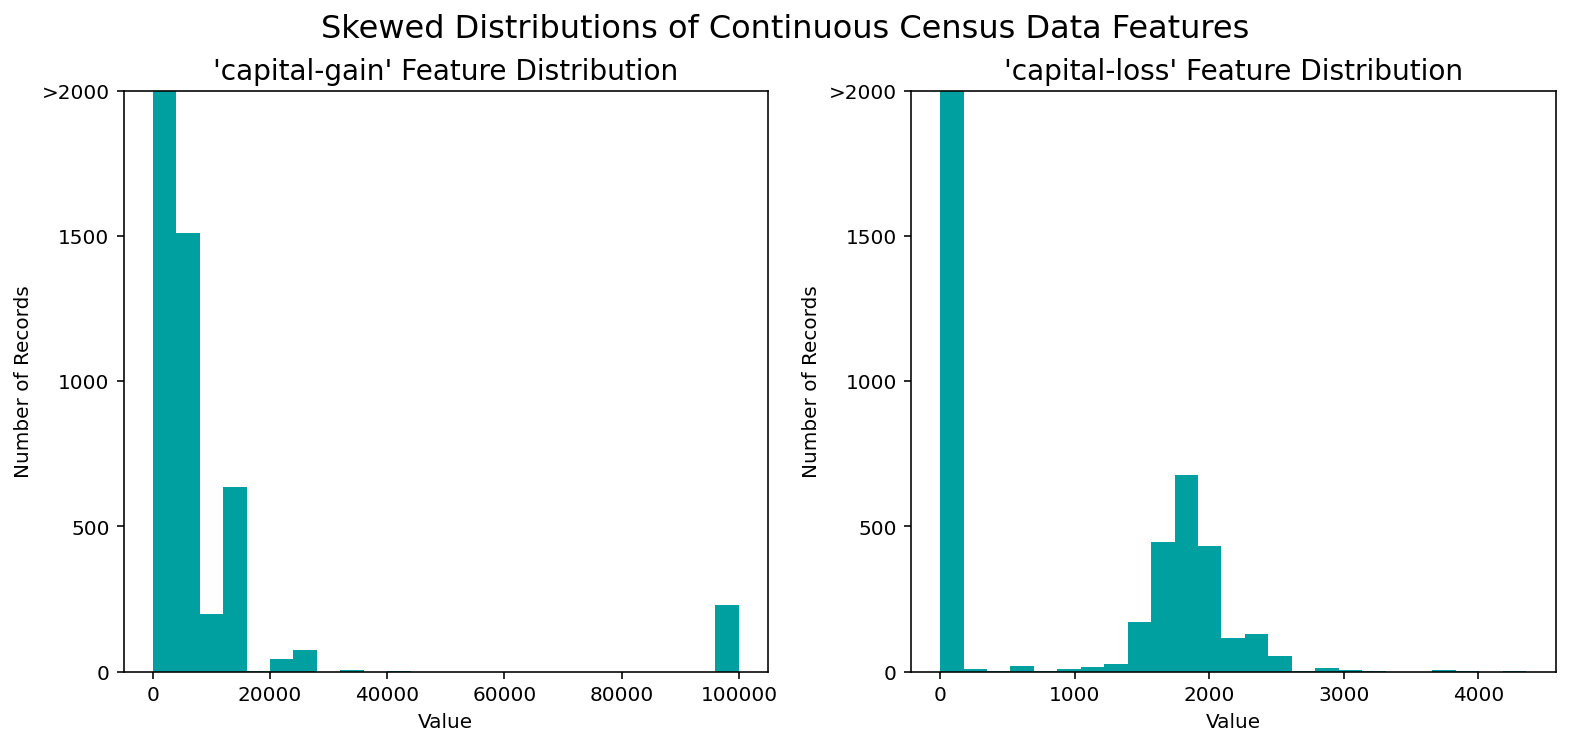

In [37]:
# Split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

# Visualize skewed continuous features of original data
vs.distribution(data)

In [38]:
# exploring the arrays
print(income_raw)
print(features_raw)


0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
45217    <=50K
45218    <=50K
45219    <=50K
45220    <=50K
45221     >50K
Name: income, Length: 45222, dtype: object
       age          workclass  ... hours-per-week  native-country
0       39          State-gov  ...           40.0   United-States
1       50   Self-emp-not-inc  ...           13.0   United-States
2       38            Private  ...           40.0   United-States
3       53            Private  ...           40.0   United-States
4       28            Private  ...           40.0            Cuba
...    ...                ...  ...            ...             ...
45217   33            Private  ...           40.0   United-States
45218   39            Private  ...           36.0   United-States
45219   38            Private  ...           50.0   United-States
45220   44            Private  ...           40.0   United-States
45221   35       Self-emp-inc  ...           60.0   United-States


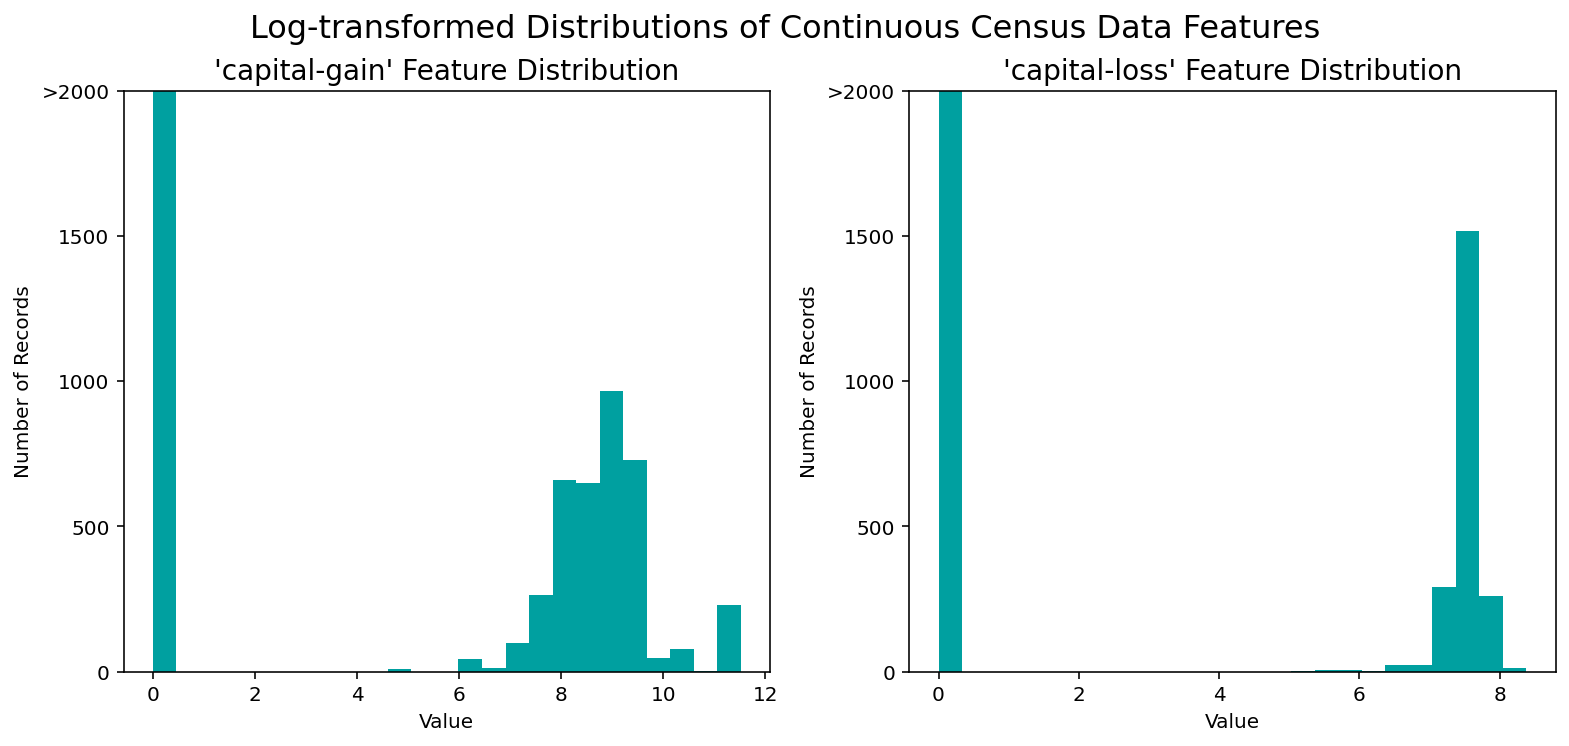

In [39]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(features_log_transformed, transformed = True)



### Normalizing Numerical Features: `MinMaxScaler`


In [40]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


---
# Task: $\downarrow$

### **One-hot encoding** and `.replace`

In [41]:
# implementing: data preprocessing 
final_encoded_features = pd.get_dummies(features_log_minmax_transform)
display(final_encoded_features.head(n=5))

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_level_ 10th,education_level_ 11th,education_level_ 12th,education_level_ 1st-4th,education_level_ 5th-6th,education_level_ 7th-8th,education_level_ 9th,education_level_ Assoc-acdm,education_level_ Assoc-voc,education_level_ Bachelors,education_level_ Doctorate,education_level_ HS-grad,education_level_ Masters,education_level_ Preschool,education_level_ Prof-school,education_level_ Some-college,marital-status_ Divorced,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,...,native-country_ Canada,native-country_ China,native-country_ Columbia,native-country_ Cuba,native-country_ Dominican-Republic,native-country_ Ecuador,native-country_ El-Salvador,native-country_ England,native-country_ France,native-country_ Germany,native-country_ Greece,native-country_ Guatemala,native-country_ Haiti,native-country_ Holand-Netherlands,native-country_ Honduras,native-country_ Hong,native-country_ Hungary,native-country_ India,native-country_ Iran,native-country_ Ireland,native-country_ Italy,native-country_ Jamaica,native-country_ Japan,native-country_ Laos,native-country_ Mexico,native-country_ Nicaragua,native-country_ Outlying-US(Guam-USVI-etc),native-country_ Peru,native-country_ Philippines,native-country_ Poland,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.301370,0.800000,0.667492,0.0,0.397959,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.452055,0.800000,0.000000,0.0,0.122449,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.287671,0.533333,0.000000,0.0,0.397959,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0.493151,0.400000,0.000000,0.0,0.397959,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.150685,0.800000,0.000000,0.0,0.397959,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [42]:
income_numeric = income_raw.replace(["<=50K",">50K"],[0,1])
print(income_numeric)

0        0
1        0
2        0
3        0
4        0
        ..
45217    0
45218    0
45219    0
45220    0
45221    1
Name: income, Length: 45222, dtype: int64


In [43]:
# TODO: One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
features_final = final_encoded_features

# TODO: Encode the 'income_raw' data to numerical values
income = income_numeric

# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

# Uncomment the following line to see the encoded feature names
print(encoded)

103 total features after one-hot encoding.
['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_level_ 10th', 'education_level_ 11th', 'education_level_ 12th', 'education_level_ 1st-4th', 'education_level_ 5th-6th', 'education_level_ 7th-8th', 'education_level_ 9th', 'education_level_ Assoc-acdm', 'education_level_ Assoc-voc', 'education_level_ Bachelors', 'education_level_ Doctorate', 'education_level_ HS-grad', 'education_level_ Masters', 'education_level_ Preschool', 'education_level_ Prof-school', 'education_level_ Some-college', 'marital-status_ Divorced', 'marital-status_ Married-AF-spouse', 'marital-status_ Married-civ-spouse', 'marital-status_ Married-spouse-absent', 'marital-status_ Never-married', 'marital-status_ Separated', 'marital-status_ Widowed', 'occupation_ A

---

### Shuffle and split data
- Splitting the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.
- `from sklearn.model_selection import train_test_split`

In [44]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    income, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 36177 samples.
Testing set has 9045 samples.


## Evaluating model performance

### Metrics and the naive predictor
- **Precision** and **recall** come in very handy when the classification problems that are **skewed** in their classification distributions.
>For example, predicting a blue ball from a bucket that has 2 red balls against 98 blue balls.
- Thus, **Precision** and **recall** can be combined to get the $F1 score$, a weighted average(harmonic mean) of the precision and recall scores. 
- F-score can range from 0 to 1, with 1 being the best possible F1 score(we take the harmonic mean as we are dealing with ratios).
> ---
- We can use **F-beta score** as a metric that considers both precision and recall:

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

>- $\to$ when $\beta = 0.5$, more emphasis is placed on ***precision***. 

This is called the **F$_{0.5}$ score** (or F-score for simplicity).

- Thus, **Precision** and **recall** can be combined to get the $F1 score$, a weighted average(harmonic mean) of the precision and recall scores. 
>---
- $Accuracy$ : ratio $\big(\frac{number~of~correct~ predictions}{number~of~predictions~or~test~data~ points}\big)$
> Measures how often the predictor classifier makes correct desicion. 
>
- $Presicion$ : 
> Measures the proportion of messages the user classifies as spam or unwanted. Unwanted spam classified as unwanted by user 
- $Recall$ : proportion of unwanted messages the predictor classifies as unwanted $\to$ number of (`<=50K` entries = 0) 


 $Accuracy = Precision: \frac{True~Positives}{(True~ Positives + False~Positives)}$ as 
 
Models behaviour:
- predicted a target as true --> found `1`
- predicted a nontarget as false --> found `0`
- predicted a target as false --> found `1`
- predicted a nontarget as true --> found `0`



 every prediction that we have made with value '1' that should have '0' becomes a False Positive; therefore our denominator in this case is the total number of records we have in total.

In [67]:
'''
# Counting Ones as below is the naive case. Note that 'income' is 'income_raw' 
encoded to numerical values done in the data preprocessing pre-step.
'''
TP = np.sum(income) 
FP = income.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case

# TODO: Calculate accuracy, precision and recall
accuracy = float(TP)/(TP+FP)
recall = float(TP)/(TP+FP)
precision = accuracy 

'''
TODO: Calculate F-score using the formula above for beta = 0.5 and 
correct values for precision and recall.
'''
beta=0.5
fscore = (1+beta**2)*(precision*recall)/(beta**2*precision+recall)

# Print the results 
print("Beta: {:.4f}".format(beta))
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Beta: 0.5000
Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2478]


# Task: $\downarrow$

### Question 1 - Naive Predictor Performace
If we chose a model that always predicted an individual made more than $50,000, what would that model's accuracy and F-score be on this dataset? You must use the code cell below and assign your results to 'accuracy' and 'fscore' to be used later.

In [66]:
precision_score = float(TP)/(TP+FP)
print("precision_score:")
print(precision_score)

recall_score = float(TP)/(TP+FN)
print("recall_score:")
print(recall_score)

accuracy_score = float(TP+TN)/(TP+FN+TN+FP)
print("recall_score:")
print(recall_score)

precision_score:
0.2478439697492371
recall_score:
1.0
recall_score:
1.0


---
Recall that the `percentage >50K` is approx. `25%` Thus, we can assume that the dataset binarly splits as `(25%, 75%)` which is ***unbalanced*** compared to a binary `(50%, 50%)` dataset split.

